# Predicting the price of used Toyota Corolla cars

## Data Preprocessing

In [897]:
import sys
!{sys.executable} -m pip install dmba

In [898]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn import preprocessing #preprocessing
from sklearn.model_selection import train_test_split #train and test models
from sklearn.linear_model import LinearRegression #Linear regression

from dmba import regressionSummary, adjusted_r2_score #regression model

from sklearn.neighbors import KNeighborsRegressor #k-NN Regressor for prediction
from sklearn.metrics import mean_squared_error #MSE regression loss

import timeit #measure execution time

from sklearn.model_selection import GridSearchCV #exhaustive search over specified parameter values for an estimator
from sklearn.tree import DecisionTreeRegressor #Decision tree
from sklearn import metrics #implements functions assessing prediction error for specific purposes.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #Random forest and Gradient boost


In [899]:
%matplotlib inline

In [900]:
# load data (first 5 rows)

corollas = pd.read_csv('ToyotaCorolla.csv')
corollas.head()

,Id,Price,Age_08_22,KM,Fuel_Type,HP,Color,Automatic,CC,Doors,...,Airbag_1,Airbag_2,Airco,CD_Player,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Metallic_Rim
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,13500.0,23.0,46986.0,Diesel,90.0,Blue,0.0,2000.0,3.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,13750.0,23.0,72937.0,Diesel,90.0,Silver,0.0,2000.0,3.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [901]:
#length of each element in the pandas series

len(corollas)

2872

In [902]:
#correlation of columns

corollas.corr()

,Id,Price,Age_08_22,KM,HP,Automatic,CC,Doors,Cylinders,Gears,...,Airbag_1,Airbag_2,Airco,CD_Player,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Metallic_Rim
Id,1.000000,-0.737859,0.906132,0.273298,-0.109375,0.066265,-0.116432,-0.130207,NaN,-0.043343,...,-0.123465,-0.358316,-0.385579,-0.464520,-0.236723,-0.091587,-0.010971,-0.114208,-0.028704,-0.022232
Price,-0.737859,1.000000,-0.876389,-0.569586,0.315574,0.033366,0.124491,0.184464,NaN,0.063304,...,0.093480,0.248551,0.428183,0.480355,0.355966,0.064168,-0.041484,0.280233,0.162765,0.109200
Age_08_22,0.906132,-0.876389,1.000000,0.505672,-0.156622,0.031717,-0.096328,-0.148359,NaN,-0.005364,...,-0.105406,-0.329017,-0.402953,-0.510895,-0.283856,-0.069192,0.013791,-0.116181,-0.110988,-0.040045
KM,0.273298,-0.569586,0.505672,1.000000,-0.333538,-0.081854,0.103450,-0.036197,NaN,0.015023,...,-0.018012,-0.139275,-0.133222,-0.266826,-0.156242,0.007397,0.013661,-0.072343,-0.044784,-0.013599
HP,-0.109375,0.315574,-0.156622,-0.333538,1.000000,0.013144,0.036845,0.092424,NaN,0.209477,...,0.025137,0.017644,0.241429,0.102300,0.265593,0.048850,0.020998,0.232181,-0.006027,0.206784
Automatic,0.066265,0.033366,0.031717,-0.081854,0.013144,1.000000,0.067084,-0.027654,NaN,-0.098555,...,-0.011895,0.001171,-0.028196,-0.010967,-0.005864,-0.004469,-0.014600,0.060680,0.013175,-0.078095
CC,-0.116432,0.124491,-0.096328,0.103450,0.036845,0.067084,1.000000,0.078303,NaN,0.014807,...,0.022492,0.024043,0.119354,0.059227,0.054373,0.032781,0.000127,-0.001237,-0.035626,0.002116
Doors,-0.130207,0.184464,-0.148359,-0.036197,0.092424,-0.027654,0.078303,1.000000,NaN,-0.160141,...,0.053828,0.021734,0.169967,0.094653,0.107626,0.059792,-0.008318,-0.005523,-0.129881,-0.039555
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063304,-0.005364,0.015023,0.209477,-0.098555,0.014807,-0.160141,NaN,1.000000,...,0.002444,0.095210,0.145636,-0.047466,0.131423,0.021200,0.015090,0.141555,0.174117,0.295077


In [903]:
# No.of.observations and different columns in the dataset

corollas.shape

(2872, 24)

In [904]:
# data types of each column

corollas.dtypes

Id                 float64
Price              float64
Age_08_22          float64
KM                 float64
Fuel_Type           object
HP                 float64
Color               object
Automatic          float64
CC                 float64
Doors              float64
Cylinders          float64
Gears              float64
Mfr_Guarantee      float64
ABS                float64
Airbag_1           float64
Airbag_2           float64
Airco              float64
CD_Player          float64
Powered_Windows    float64
Power_Steering     float64
Radio              float64
Mistlamps          float64
Sport_Model        float64
Metallic_Rim       float64
dtype: object

In [905]:
#descriptive statistics for specified columns (by excluding NA values)

corollas[["KM","HP","CC"]].describe(include="all")

,KM,HP,CC
count,1436.000000,1436.000000,1431.000000
mean,68533.259749,101.502089,1576.355695
std,37506.448872,14.981080,424.806511
min,1.000000,69.000000,1300.000000
25%,43000.000000,90.000000,1400.000000
50%,63389.500000,110.000000,1600.000000
75%,87020.750000,110.000000,1600.000000
max,243000.000000,192.000000,16000.000000


In [906]:
# categories in the "Color" column.

print(corollas["Color"].value_counts())
print("\n There are " + str(len(corollas["Color"].value_counts())) + " different Corolla colors in this dataset!")

Grey      297
Blue      281
Red       278
Green     218
Black     190
Silver    122
White      31
Violet      4
Yellow      3
Beige       3
Name: Color, dtype: int64

 There are 10 different Corolla colors in this dataset!


In [907]:
# count of unique values in the column

print(corollas["Fuel_Type"].value_counts())

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64


In [908]:
# check for null values

corollas.isnull().sum()

Id                 1436
Price              1437
Age_08_22          1436
KM                 1436
Fuel_Type          1436
HP                 1436
Color              1445
Automatic          1436
CC                 1441
Doors              1436
Cylinders          1436
Gears              1436
Mfr_Guarantee      1437
ABS                1436
Airbag_1           1436
Airbag_2           1436
Airco              1437
CD_Player          1436
Powered_Windows    1436
Power_Steering     1436
Radio              1436
Mistlamps          2471
Sport_Model        1436
Metallic_Rim       1436
dtype: int64

In [909]:
# drop the rows having all observations as NA values

corollas=corollas.dropna(axis=0,how="all")

In [910]:
corollas.isnull().sum()

Id                    0
Price                 1
Age_08_22             0
KM                    0
Fuel_Type             0
HP                    0
Color                 9
Automatic             0
CC                    5
Doors                 0
Cylinders             0
Gears                 0
Mfr_Guarantee         1
ABS                   0
Airbag_1              0
Airbag_2              0
Airco                 1
CD_Player             0
Powered_Windows       0
Power_Steering        0
Radio                 0
Mistlamps          1035
Sport_Model           0
Metallic_Rim          0
dtype: int64

In [911]:
# total NA values

sum(corollas.isnull().sum().values)

1052

In [912]:
# drop column with more NA values

corollas=corollas.drop(["Mistlamps"],axis=1)

In [913]:
sum(corollas.isnull().sum().values)

17

In [914]:
# Impute the color column with assorted colors of yellow and biege in replacement for NA values in the Color column

corollas = corollas.fillna(value = {"Color":'Yellow/Biege'})

In [915]:
corollas.isnull().sum()

Id                 0
Price              1
Age_08_22          0
KM                 0
Fuel_Type          0
HP                 0
Color              0
Automatic          0
CC                 5
Doors              0
Cylinders          0
Gears              0
Mfr_Guarantee      1
ABS                0
Airbag_1           0
Airbag_2           0
Airco              1
CD_Player          0
Powered_Windows    0
Power_Steering     0
Radio              0
Sport_Model        0
Metallic_Rim       0
dtype: int64

In [916]:
# drop all the observations with NA values

corollas_new = corollas.dropna(axis=0, how = 'any')

In [917]:
corollas_new.isnull().sum()

Id                 0
Price              0
Age_08_22          0
KM                 0
Fuel_Type          0
HP                 0
Color              0
Automatic          0
CC                 0
Doors              0
Cylinders          0
Gears              0
Mfr_Guarantee      0
ABS                0
Airbag_1           0
Airbag_2           0
Airco              0
CD_Player          0
Powered_Windows    0
Power_Steering     0
Radio              0
Sport_Model        0
Metallic_Rim       0
dtype: int64

In [918]:
# No.of. observations lost from the original data

print(len(corollas_new))
print(len(corollas) - len(corollas_new))

1428
8


In [919]:
#creating dummy variables for all categorical variables

corollas_new = pd.get_dummies(corollas_new,drop_first=True) 

In [920]:
corollas_new.head()

,Id,Price,Age_08_22,KM,HP,Automatic,CC,Doors,Cylinders,Gears,...,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow,Color_Yellow/Biege
1,1.0,13500.0,23.0,46986.0,90.0,0.0,2000.0,3.0,4.0,5.0,...,0,1,0,0,0,0,0,0,0,0
3,2.0,13750.0,23.0,72937.0,90.0,0.0,2000.0,3.0,4.0,5.0,...,0,0,0,0,0,1,0,0,0,0
5,3.0,13950.0,24.0,41711.0,90.0,0.0,2000.0,3.0,4.0,5.0,...,0,1,0,0,0,0,0,0,0,0
7,4.0,14950.0,26.0,48000.0,90.0,0.0,2000.0,3.0,4.0,5.0,...,1,0,0,0,0,0,0,0,0,0
9,5.0,13750.0,30.0,38500.0,90.0,0.0,2000.0,3.0,4.0,5.0,...,1,0,0,0,0,0,0,0,0,0


In [921]:
corollas_new.dtypes

Id                    float64
Price                 float64
Age_08_22             float64
KM                    float64
HP                    float64
Automatic             float64
CC                    float64
Doors                 float64
Cylinders             float64
Gears                 float64
Mfr_Guarantee         float64
ABS                   float64
Airbag_1              float64
Airbag_2              float64
Airco                 float64
CD_Player             float64
Powered_Windows       float64
Power_Steering        float64
Radio                 float64
Sport_Model           float64
Metallic_Rim          float64
Fuel_Type_Diesel        uint8
Fuel_Type_Petrol        uint8
Color_Black             uint8
Color_Blue              uint8
Color_Green             uint8
Color_Grey              uint8
Color_Red               uint8
Color_Silver            uint8
Color_Violet            uint8
Color_White             uint8
Color_Yellow            uint8
Color_Yellow/Biege      uint8
dtype: obj

In [922]:
corollas_new.describe()

,Id,Price,Age_08_22,KM,HP,Automatic,CC,Doors,Cylinders,Gears,...,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow,Color_Yellow/Biege
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.0,1428.000000,...,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,725.066527,10686.676471,56.156162,68670.009104,101.523810,0.056022,1576.306022,4.029412,4.0,5.026611,...,0.133053,0.196078,0.152661,0.205882,0.193277,0.084034,0.002801,0.021709,0.002101,0.006303
std,414.974722,3582.603991,18.435595,37514.859102,15.008948,0.230046,425.053636,0.952540,0.0,0.189028,...,0.339751,0.397168,0.359786,0.404487,0.395007,0.277535,0.052870,0.145782,0.045803,0.079166
min,1.000000,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,367.750000,8450.000000,44.000000,43000.000000,86.000000,0.000000,1400.000000,3.000000,4.0,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,725.500000,9900.000000,61.000000,63479.500000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1083.250000,11906.250000,70.000000,87295.000000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [923]:
#response variable and predictors extracted seperately

response_corollas=corollas_new['Price']
predictors_corollas=corollas_new.loc[:,corollas_new.columns!='Price']

In [924]:
# normalize predictors using standardization (i.e., force all predictors to have mean = 0  and standard deviation = 1)

z_score_norm = preprocessing.StandardScaler()
corollas_normalized= z_score_norm.fit_transform(predictors_corollas)
corollas_normalized = pd.DataFrame(corollas_normalized, columns = predictors_corollas.columns)
corollas_normalized.head(10)

,Id,Age_08_22,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Mfr_Guarantee,...,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow,Color_Yellow/Biege
0,-1.745456,-1.799116,-0.578214,-0.768065,-0.243613,0.997150,-1.08108,0.0,-0.140826,-0.834243,...,-0.391757,2.024846,-0.424459,-0.509175,-0.489473,-0.302891,-0.053,-0.148964,-0.045883,-0.07964
1,-1.743046,-1.799116,0.113781,-0.768065,-0.243613,0.997150,-1.08108,0.0,-0.140826,-0.834243,...,-0.391757,-0.493865,-0.424459,-0.509175,-0.489473,3.301515,-0.053,-0.148964,-0.045883,-0.07964
2,-1.740635,-1.744854,-0.718874,-0.768065,-0.243613,0.997150,-1.08108,0.0,-0.140826,1.198691,...,-0.391757,2.024846,-0.424459,-0.509175,-0.489473,-0.302891,-0.053,-0.148964,-0.045883,-0.07964
3,-1.738224,-1.636330,-0.551175,-0.768065,-0.243613,0.997150,-1.08108,0.0,-0.140826,1.198691,...,2.552604,-0.493865,-0.424459,-0.509175,-0.489473,-0.302891,-0.053,-0.148964,-0.045883,-0.07964
4,-1.735814,-1.419283,-0.804497,-0.768065,-0.243613,0.997150,-1.08108,0.0,-0.140826,1.198691,...,2.552604,-0.493865,-0.424459,-0.509175,-0.489473,-0.302891,-0.053,-0.148964,-0.045883,-0.07964
5,-1.733403,-1.310759,-0.204524,-0.768065,-0.243613,0.997150,-1.08108,0.0,-0.140826,-0.834243,...,-0.391757,-0.493865,-0.424459,-0.509175,-0.489473,-0.302891,-0.053,6.713011,-0.045883,-0.07964
6,-1.730992,-1.582069,0.691755,-0.768065,-0.243613,0.997150,-1.08108,0.0,-0.140826,-0.834243,...,-0.391757,-0.493865,-0.424459,1.963961,-0.489473,-0.302891,-0.053,-0.148964,-0.045883,-0.07964
7,-1.728582,-1.419283,0.192498,-0.768065,-0.243613,0.997150,-1.08108,0.0,-0.140826,1.198691,...,-0.391757,-0.493865,-0.424459,1.963961,-0.489473,-0.302891,-0.053,-0.148964,-0.045883,-0.07964
8,-1.726171,-1.582069,-1.305807,6.030262,-0.243613,0.526457,-1.08108,0.0,-0.140826,-0.834243,...,-0.391757,-0.493865,-0.424459,-0.509175,2.043016,-0.302891,-0.053,-0.148964,-0.045883,-0.07964
9,-1.723760,-1.799116,0.065810,-2.167720,-0.243613,0.761804,-1.08108,0.0,-0.140826,-0.834243,...,-0.391757,2.024846,-0.424459,-0.509175,-0.489473,-0.302891,-0.053,-0.148964,-0.045883,-0.07964


In [925]:
corollas_normalized.describe()

,Id,Age_08_22,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Mfr_Guarantee,...,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow,Color_Yellow/Biege
count,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1428.0,1.428000e+03,1.428000e+03,...,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03,1.428000e+03
mean,8.863125e-17,-3.839133e-16,1.041806e-17,-8.604228e-16,5.472202e-16,7.496581e-16,-8.404419e-16,0.0,6.219737e-18,6.608470e-18,...,-4.148564e-16,7.132483e-16,7.961263e-17,-1.526945e-16,2.527546e-16,8.544363e-17,9.021534e-17,2.141922e-16,6.141893e-16,-1.227640e-15
std,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,0.0,1.000350e+00,1.000350e+00,...,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00,1.000350e+00
min,-1.745456e+00,-2.992878e+00,-1.831090e+00,-2.167720e+00,-2.436128e-01,-6.502775e-01,-2.131272e+00,0.0,-1.072499e+01,-8.342434e-01,...,-3.917567e-01,-4.938648e-01,-4.244588e-01,-5.091751e-01,-4.894725e-01,-3.028913e-01,-5.299989e-02,-1.489645e-01,-4.588315e-02,-7.963978e-02
25%,-8.613578e-01,-6.596164e-01,-6.845022e-01,-1.034666e+00,-2.436128e-01,-4.149307e-01,-1.081080e+00,0.0,-1.408258e-01,-8.342434e-01,...,-3.917567e-01,-4.938648e-01,-4.244588e-01,-5.091751e-01,-4.894725e-01,-3.028913e-01,-5.299989e-02,-1.489645e-01,-4.588315e-02,-7.963978e-02
50%,1.044944e-03,2.628358e-01,-1.384072e-01,5.649403e-01,-2.436128e-01,5.576303e-02,-3.088800e-02,0.0,-1.408258e-01,-8.342434e-01,...,-3.917567e-01,-4.938648e-01,-4.244588e-01,-5.091751e-01,-4.894725e-01,-3.028913e-01,-5.299989e-02,-1.489645e-01,-4.588315e-02,-7.963978e-02
75%,8.634477e-01,7.511928e-01,4.966436e-01,5.649403e-01,-2.436128e-01,5.576303e-02,1.019304e+00,0.0,-1.408258e-01,1.198691e+00,...,-3.917567e-01,-4.938648e-01,-4.244588e-01,-5.091751e-01,-4.894725e-01,-3.028913e-01,-5.299989e-02,-1.489645e-01,-4.588315e-02,-7.963978e-02
max,1.728261e+00,1.293812e+00,4.648586e+00,6.030262e+00,4.104875e+00,3.394571e+01,1.019304e+00,0.0,5.151258e+00,1.198691e+00,...,2.552604e+00,2.024846e+00,2.355941e+00,1.963961e+00,2.043016e+00,3.301515e+00,1.886796e+01,6.713011e+00,2.179449e+01,1.255654e+01


In [926]:
corollas_normalized.shape

(1428, 32)

# MULTIPLE LINEAR REGRESSION: Train and test data

In [927]:
# partition data into train and test sets

X = corollas_normalized
y = response_corollas
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [928]:
# train the LR model

linear_model = LinearRegression()
linear_model = linear_model.fit(train_X, train_y)

In [929]:
# print the coefficients

print('intercept ', linear_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': linear_model.coef_}))

intercept  10641.710470434486
             Predictor   coefficient
0                   Id  2.356130e+02
1            Age_08_22 -2.631320e+03
2                   KM -6.738184e+02
3                   HP  6.926888e+02
4            Automatic  2.532138e+02
5                   CC  2.292034e+01
6                Doors  1.993464e+02
7            Cylinders -8.043344e-12
8                Gears  7.808386e+01
9        Mfr_Guarantee  1.581408e+02
10                 ABS -2.109186e+02
11            Airbag_1  4.394486e+01
12            Airbag_2 -1.108749e+02
13               Airco  1.370079e+02
14           CD_Player  1.392856e+02
15     Powered_Windows  1.688850e+02
16      Power_Steering -3.353880e+01
17               Radio -4.068097e+01
18         Sport_Model  3.266150e+02
19        Metallic_Rim  1.179828e+02
20    Fuel_Type_Diesel  7.516307e+02
21    Fuel_Type_Petrol  1.190450e+02
22         Color_Black  4.959267e+02
23          Color_Blue  4.970347e+02
24         Color_Green  3.529313e+02
25      

In [930]:
# print performance metrics on training set

predicted_y_training = linear_model.predict(train_X)
regressionSummary(train_y, predicted_y_training)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1379.0941
            Mean Absolute Error (MAE) : 1022.6816
          Mean Percentage Error (MPE) : -1.2916
Mean Absolute Percentage Error (MAPE) : 10.2781


In [931]:
# look at the adjusted r^2

print(adjusted_r2_score(train_y, predicted_y_training, linear_model))

0.8462001006737985


In [932]:
# Performance on the test data

predicted_y_test = linear_model.predict(test_X)  # these are our y_hat values!!

result = pd.DataFrame({'Predicted': predicted_y_test, 'Actual': test_y,
                       'Residual': test_y - predicted_y_test})
result.head()

,Predicted,Actual,Residual
1161,11376.678816,11930.0,553.321184
583,13807.924908,13875.0,67.075092
1325,9535.108354,9250.0,-285.108354
489,13772.322208,11690.0,-2082.322208
1897,7049.991598,7750.0,700.008402


In [933]:
# model performance in prediction

regressionSummary(test_y, predicted_y_test)


Regression statistics

                      Mean Error (ME) : 149.6770
       Root Mean Squared Error (RMSE) : 1249.6465
            Mean Absolute Error (MAE) : 940.9898
          Mean Percentage Error (MPE) : 0.5793
Mean Absolute Percentage Error (MAPE) : 9.0380


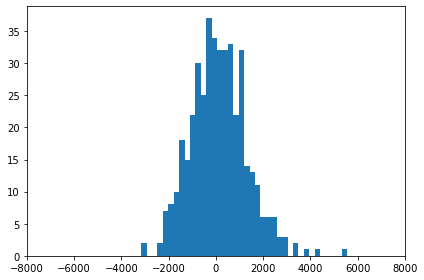

In [934]:
# check if residuals are normally distributed

residuals = test_y - predicted_y_test

plt.hist(residuals, bins = 50) #try changing bins=100,150
plt.xlim([-8000,8000])
plt.tight_layout()
plt.show()

# k-NN: Train and test data

In [935]:
# create train and test splits

X = corollas_normalized
y = response_corollas
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [936]:
# train the k-NN model and look at performance on train data

knn_p = KNeighborsRegressor(n_neighbors=5).fit(train_X, train_y)
predicted_y_training3 = knn_p.predict(train_X)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y, predicted_y_training3) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1337.0067


In [937]:
# performance of k-NN on test data

predicted_y_test3 = knn_p.predict(test_X)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y, predicted_y_test3) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1578.5813


In [938]:
#search for best hyperparameters

knn = KNeighborsRegressor()
candidates=[{'n_neighbors':[2,3,4,5,6],'weights':['uniform','distance']}]
grid=GridSearchCV(estimator=knn,param_grid=candidates)
grid.fit(train_X,train_y)
print(grid.best_params_)

{'n_neighbors': 6, 'weights': 'distance'}


In [939]:
# train the k-NN model and look at performance on train data after changing hyperparameter(n_neighbors=6)

knn_p = KNeighborsRegressor(n_neighbors=5,weights='distance').fit(train_X, train_y)
predicted_y_training3 = knn_p.predict(train_X)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y, predicted_y_training3) ** 0.5, 4))

Root Mean Squared Error (RMSE):  0.0002


In [940]:
# performance of k-NN on test data after changing hyperparameter(n_neighbors=6)

predicted_y_test3 = knn_p.predict(test_X)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y, predicted_y_test3) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1566.2148


In [941]:
# optimal value of k

results = []
for k in range(1, 30):
    knn_p2 = KNeighborsRegressor(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'RMSE': round(mean_squared_error(test_y, knn_p2.predict(test_X)) ** 0.5, 4)
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k       RMSE
0    1  1979.0171
1    2  1732.4916
2    3  1682.2348
3    4  1579.3401
4    5  1578.5813
5    6  1600.9794
6    7  1590.2652
7    8  1590.2616
8    9  1621.1365
9   10  1631.6331
10  11  1634.5304
11  12  1650.8029
12  13  1682.9334
13  14  1702.2027
14  15  1698.1603
15  16  1696.0949
16  17  1716.0813
17  18  1737.5493
18  19  1743.1599
19  20  1753.7795
20  21  1774.5618
21  22  1785.9079
22  23  1794.5237
23  24  1800.4327
24  25  1810.4676
25  26  1820.1243
26  27  1818.1023
27  28  1824.9279
28  29  1834.7231


In [942]:
#compare k-NN to linear regression

linear_model = LinearRegression()
linear_model = linear_model.fit(train_X, train_y)
predicted_y_training4 = linear_model.predict(train_X)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y, predicted_y_training4) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1379.0941


In [943]:

# performance of linear regression on test data

predicted_y_test4 = linear_model.predict(test_X)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y, predicted_y_test4) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1249.6465


# Tree based model: Train and test data

## 1. Decision tree

In [944]:
# partition data into train and test sets

X = predictors_corollas
y = response_corollas
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=13)

In [945]:
#fitting independent variables to the dependent variables
# train the DT model (using default parameter settings!) and look at performance on train data
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

DT_corollas = DecisionTreeRegressor(random_state=13).fit(train_X, train_y)

In [946]:
#score for training data

DT_corollas.score(train_X,train_y)

1.0

In [947]:
predicted_y_training = DT_corollas.predict(train_X)
DT_corollas_training=pd.DataFrame({'Actual':train_y,'Predicted':predicted_y_training})
DT_corollas_training

,Actual,Predicted
2733,8250.0,8250.0
2743,8950.0,8950.0
477,13950.0,13950.0
1547,10950.0,10950.0
2339,9250.0,9250.0
...,...,...
1749,8950.0,8950.0
1501,10450.0,10450.0
155,18450.0,18450.0
369,17795.0,17795.0


In [948]:
#performance on train data

print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, predicted_y_training))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, predicted_y_training))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, predicted_y_training)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [949]:
#defining model evaluation rules

DT_corollas.score(test_X,test_y)

0.759150671201976

In [950]:
#predicts an output

predicted_y_testing = DT_corollas.predict(test_X)
DT_corollas_test=pd.DataFrame({'Actual':test_y,'Predicted':predicted_y_testing})
DT_corollas_test

,Actual,Predicted
357,21950.0,19950.0
2001,8950.0,10900.0
213,18800.0,20950.0
857,10500.0,8750.0
287,18500.0,18950.0
...,...,...
347,18950.0,21500.0
167,17950.0,18750.0
1849,9950.0,9900.0
657,12950.0,13995.0


In [951]:
#performance on test data

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predicted_y_testing))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predicted_y_testing))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predicted_y_testing)))

Mean Absolute Error: 1239.5571095571095
Mean Squared Error: 3130785.668997669
Root Mean Squared Error: 1769.4026305501156


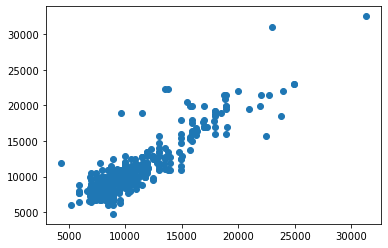

In [952]:
#scatter plot

plt.scatter(test_y,predicted_y_testing)

In [953]:
#defining the range of parameters

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [954]:
#Exhaustive search over specified parameter values for an estimator

tuning_model=GridSearchCV(DT_corollas,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [955]:
#tuning_model.fit(train_X,train_y)

In [956]:
#findimg best parameters

#tuning_model.best_params_

In [957]:
#tuning the hyperparameters

tuned_DT_corollas= DecisionTreeRegressor(max_depth=5,max_features='sqrt',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [958]:
tuned_DT_corollas.fit(train_X,train_y)

DecisionTreeRegressor(max_depth=5, max_features='sqrt', max_leaf_nodes=50,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [959]:
tuned_pred=tuned_DT_corollas.predict(test_X)

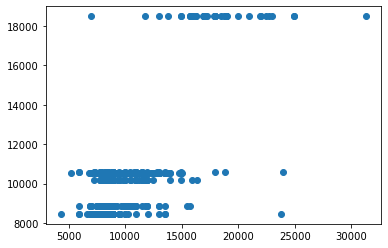

In [960]:
plt.scatter(test_y,tuned_pred)

In [961]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, tuned_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, tuned_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, tuned_pred)))

Mean Absolute Error: 1707.769402176964
Mean Squared Error: 6096394.39161916
Root Mean Squared Error: 2469.0877650701605


In [962]:
tuned_DT_corollas.score(test_X,test_y)

0.5310082986997964

## 2. Random forest (Bagging)

In [963]:
RF_corollas = RandomForestRegressor(random_state=13).fit(train_X, train_y)
predicted_y_training = RF_corollas.predict(train_X)

In [964]:
RF_corollas_training=pd.DataFrame({'Actual':train_y,'Predicted':predicted_y_training})
RF_corollas_training

,Actual,Predicted
2733,8250.0,8260.00
2743,8950.0,8675.45
477,13950.0,13405.50
1547,10950.0,10489.90
2339,9250.0,8815.00
...,...,...
1749,8950.0,9061.34
1501,10450.0,10100.44
155,18450.0,18140.07
369,17795.0,18551.55


In [965]:
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, predicted_y_training))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, predicted_y_training))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, predicted_y_training)))

Mean Absolute Error: 313.05772772772764
Mean Squared Error: 178768.35296746745
Root Mean Squared Error: 422.8100672494299


In [966]:
predicted_y_testing = RF_corollas.predict(test_X)
RF_corollas_test=pd.DataFrame({'Actual':test_y,'Predicted':predicted_y_testing})
RF_corollas_test

,Actual,Predicted
357,21950.0,20573.60
2001,8950.0,9249.35
213,18800.0,18778.95
857,10500.0,10465.75
287,18500.0,19970.50
...,...,...
347,18950.0,18744.40
167,17950.0,18560.85
1849,9950.0,9545.50
657,12950.0,13282.85


In [967]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predicted_y_testing))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predicted_y_testing))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predicted_y_testing)))

Mean Absolute Error: 876.6138694638694
Mean Squared Error: 1385778.3912198131
Root Mean Squared Error: 1177.1908898814215


In [968]:
tuned_RF_corollas=RandomForestRegressor(n_estimators=20, max_depth=20)

In [969]:
tuned_RF_corollas.fit(train_X,train_y)

RandomForestRegressor(max_depth=20, n_estimators=20)

In [970]:
tuned_training = tuned_RF_corollas.predict(train_X)

In [971]:
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, tuned_training))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, tuned_training))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, tuned_training)))

Mean Absolute Error: 325.15151540429315
Mean Squared Error: 185540.88767964375
Root Mean Squared Error: 430.74457359280075


In [972]:
tuned_testing = tuned_RF_corollas.predict(test_X)

In [973]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, tuned_testing))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, tuned_testing))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, tuned_testing)))

Mean Absolute Error: 890.6736800236799
Mean Squared Error: 1438574.9911106399
Root Mean Squared Error: 1199.4060993302644


## 3. Gradient Boosting

In [974]:
GB_corollas = GradientBoostingRegressor(random_state=13).fit(train_X, train_y)
predicted_y_training = GB_corollas.predict(train_X)

In [975]:
predicted_y_training = GB_corollas.predict(train_X)
GB_corollas_training=pd.DataFrame({'Actual':train_y,'Predicted':predicted_y_training})
GB_corollas_training

,Actual,Predicted
2733,8250.0,8160.238195
2743,8950.0,8153.028864
477,13950.0,12898.379522
1547,10950.0,9960.468752
2339,9250.0,8529.979613
...,...,...
1749,8950.0,8848.675515
1501,10450.0,10214.180561
155,18450.0,18050.317109
369,17795.0,17598.259719


In [976]:
#performance on train data

print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, predicted_y_training))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, predicted_y_training))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, predicted_y_training)))

Mean Absolute Error: 608.1693334639928
Mean Squared Error: 644976.9696608108
Root Mean Squared Error: 803.1045820195591


In [977]:
predicted_y_testing = GB_corollas.predict(test_X)
GB_corollas_test=pd.DataFrame({'Actual':test_y,'Predicted':predicted_y_testing})
GB_corollas_test

,Actual,Predicted
357,21950.0,19973.496109
2001,8950.0,9067.864223
213,18800.0,19075.650236
857,10500.0,10649.312483
287,18500.0,19101.532945
...,...,...
347,18950.0,18642.789546
167,17950.0,18859.200719
1849,9950.0,9062.975125
657,12950.0,13290.682890


In [978]:
#performance on test data

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predicted_y_testing))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predicted_y_testing))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predicted_y_testing)))

Mean Absolute Error: 849.5172972711725
Mean Squared Error: 1304175.749159814
Root Mean Squared Error: 1142.0051441039195


In [979]:
tuned_GB_corollas=GradientBoostingRegressor(n_estimators=120, max_depth=20,learning_rate=0.005)

In [980]:
tuned_GB_corollas.fit(train_X,train_y)

GradientBoostingRegressor(learning_rate=0.005, max_depth=20, n_estimators=120)

In [981]:
tuned_training = tuned_GB_corollas.predict(train_X)

In [982]:
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, tuned_training))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, tuned_training))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, tuned_training)))

Mean Absolute Error: 1406.0417539836126
Mean Squared Error: 3827550.8279229268
Root Mean Squared Error: 1956.4127447762464


In [983]:
tuned_testing = tuned_GB_corollas.predict(test_X)

In [984]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, tuned_testing))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, tuned_testing))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, tuned_testing)))

Mean Absolute Error: 1606.7398073700608
Mean Squared Error: 4845205.577388187
Root Mean Squared Error: 2201.182767829193
